In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import random
from scipy.stats import bootstrap, permutation_test
import seaborn as sns
from scipy import stats


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm  # Import tqdm


In [38]:
path = '/Users/liqingyang/nyu_courses/intro_to_ds_gs/data_analysis_1/movieReplicationSet.csv'
# Significance level at 0.005 as specified
alpha = 0.005

all_docs = pd.read_csv(path)
movies_ratings = all_docs.iloc[:, :400]
sensation_seeking = all_docs.iloc[:, 400:421]
personality = all_docs.iloc[:,421:464]
movies_experience_ratings = all_docs.iloc[:,464:474]
gender = all_docs.iloc[:,474]
only_child = all_docs.iloc[:,475]
alone = all_docs.iloc[:,476]

In [147]:
temp1 = movies_ratings.fillna(movies_ratings.mean())
temp2 = movies_ratings.apply(lambda row: row.fillna(row.mean()), axis=1).fillna(temp2.mean())

temp1_matrix = temp1.to_numpy() * 1/2
temp2_matrix = temp2.to_numpy() * 1/2
result_matrix = temp1_matrix + temp2_matrix
ratings = pd.DataFrame(result_matrix, columns=temp1.columns, index=temp1.index)
ratings


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


### Result is the ratings dataset that fills missing values with column mean or row mean randomly

1. For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that
predicts ratings the best. Then report the average COD of those 400 simple linear regression models.
Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie (and their associated COD values, as well as which movie
ratings are the best predictor, so this table should have 3 columns). 

In [148]:
lr = LinearRegression()
x = ratings.iloc[:, 1].to_numpy().reshape(-1, 1)
y = ratings.iloc[:, 0].to_numpy().reshape(-1, 1)
lr.fit(x, y)
y_pred = lr.predict(x)

In [149]:
r2_score(y, y_pred)

0.46727257889313933

In [155]:
x = ratings.iloc[:, 1].to_numpy().reshape(-1, 1)
y = ratings.iloc[:, 0].to_numpy().reshape(-1, 1)

empty_matrix = np.zeros((400, 400))
for i in range(400):
    for j in range(400):
        if i == j:
            empty_matrix[i][j] = 0
        else:
            x = ratings.iloc[:, i].to_numpy().reshape(-1, 1)
            y = ratings.iloc[:, j].to_numpy().reshape(-1, 1)
            lr.fit(x, y)
            y_pred = lr.predict(x)
            r2 = r2_score(y, y_pred)
            empty_matrix[i][j] = r2

In [233]:
cod = pd.DataFrame(empty_matrix, columns=temp1.columns, index=temp1.columns)
columns = cod.columns.to_list()

In [234]:
cod['best_predictor(highest r2)'] = cod.idxmax(axis=1)
cod['max'] = cod.apply(lambda row:  row.to_numpy().max())
cod['average_cod'] = cod.loc[:, columns].sum(axis=1)/399

<Axes: >

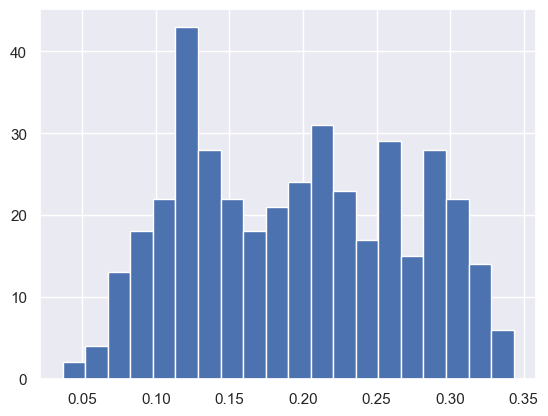

In [235]:
cod['average_cod'].hist(bins=20)

In [236]:
worst = cod['average_cod'].sort_values()[:10]
best = cod['average_cod'].sort_values()[-10:]

In [313]:
best_ = cod.loc[best.index.to_list(),['average_cod', 'best_predictor(highest r2)', 'max']]
best_

,average_cod,best_predictor(highest r2),max
Heavy Traffic (1973),0.325615,Ran (1985),0.692734
Miller's Crossing (1990),0.326459,The Lookout (2007),0.656781
The Straight Story (1999),0.326774,Congo (1995),0.700569
Patton (1970),0.327316,The Lookout (2007),0.713554
The Bandit (1996),0.327867,Best Laid Plans (1999),0.711222
Crimson Tide (1995),0.330077,The Straight Story (1999),0.678454
Erik the Viking (1989),0.334651,I.Q. (1994),0.731507
The Lookout (2007),0.339155,Patton (1970),0.713554
Sexy Beast (2000),0.341748,The Silencers (1966),0.659436
Escape from LA (1996),0.343137,Sexy Beast (2000),0.64961


In [314]:
worst_ = cod.loc[worst.index.to_list(),['average_cod', 'best_predictor(highest r2)', 'max']]
worst_

,average_cod,best_predictor(highest r2),max
Avatar (2009),0.036669,Bad Boys (1995),0.079485
The Conjuring (2013),0.042861,The Exorcist (1973),0.198474
Interstellar (2014),0.052938,Torque (2004),0.111343
Black Swan (2010),0.058106,Sorority Boys (2002),0.11708
The Cabin in the Woods (2012),0.065011,The Evil Dead (1981),0.143887
Shrek 2 (2004),0.065492,Shrek (2001),0.451027
The Avengers (2012),0.069728,Captain America: Civil War (2016),0.272223
Clueless (1995),0.071313,Escape from LA (1996),0.141426
Pirates of the Caribbean: Dead Man's Chest (2006),0.071986,Pirates of the Caribbean: At World's End (2007),0.367212
Shrek (2001),0.075705,Shrek 2 (2004),0.451027


2. For the 10 movies that are best and least well predicted from the ratings of a single other movie (so
20 in total), build multiple regression models that include gender identity (column 475), sibship status
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple
regression models) is on the y-axis.

In [247]:
gender.isna().sum()

24

<Axes: >

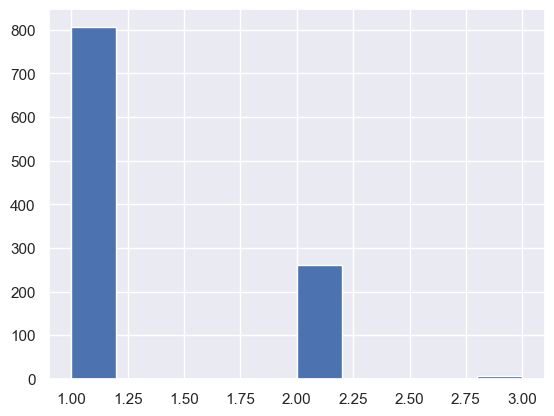

In [254]:
gender.hist()

In [251]:
only_child.isna().sum()

0

In [252]:
alone.isna().sum()

0

### Since gender has 24 missing values, and the proportion of users that has '3' for geneder is extremely small. We will fill the null values in gender column with '3'

In [276]:
gender = gender.fillna(3)
combined = pd.concat([ratings, gender, only_child, alone], axis=1)
combined.rename({'Gender identity (1 = female; 2 = male; 3 = self-described)': "gender",
                 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)': "only_child",
                 'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)':'alone'                
                },
                axis=1, inplace=True)

In [277]:
combined

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),gender,only_child,alone
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981,1.0,0,0
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000,1.0,0,0
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247,1.0,0,0
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294,1.0,0,1


In [293]:
best_movies = best_.index.to_list()
worst_movies = worst_.index.to_list()

In [291]:
best_cod = np.zeros((10, 1))
z = 0
for i in best_movies:
    
    x = combined.loc[:, [best_.loc[i, 'best_predictor(highest r2)'], 'gender', 'only_child', 'alone']].to_numpy()
    y = combined.loc[:, i].to_numpy().reshape(-1, 1)
    
    lr.fit(x, y)
    y_pred = lr.predict(x)
    r2 = r2_score(y, y_pred)
    best_cod[z] = r2
    z += 1
            

In [297]:
worst_cod = np.zeros((10, 1))
z = 0
for i in worst_movies:
    
    x = combined.loc[:, [worst_.loc[i, 'best_predictor(highest r2)'], 'gender', 'only_child', 'alone']].to_numpy()
    y = combined.loc[:, i].to_numpy().reshape(-1, 1)
    
    lr.fit(x, y)
    y_pred = lr.predict(x)
    r2 = r2_score(y, y_pred)
    worst_cod[z] = r2
    z += 1
            

In [298]:
best_cod

array([[0.69331379],
       [0.65733687],
       [0.7015857 ],
       [0.71462246],
       [0.713103  ],
       [0.67896277],
       [0.73302209],
       [0.7150511 ],
       [0.66185587],
       [0.65025913]])

In [307]:
 worst_cod

array([[0.08156762],
       [0.20290616],
       [0.1164377 ],
       [0.11813426],
       [0.15034983],
       [0.45961198],
       [0.27545637],
       [0.14843564],
       [0.36971656],
       [0.45244337]])

In [318]:
best_['new_r2_from_MR'] = best_cod
worst_['new_r2_from_MR'] = worst_cod

In [320]:
worst_

,average_cod,best_predictor(highest r2),max,new_r2_from_MR
Avatar (2009),0.036669,Bad Boys (1995),0.079485,0.081568
The Conjuring (2013),0.042861,The Exorcist (1973),0.198474,0.202906
Interstellar (2014),0.052938,Torque (2004),0.111343,0.116438
Black Swan (2010),0.058106,Sorority Boys (2002),0.11708,0.118134
The Cabin in the Woods (2012),0.065011,The Evil Dead (1981),0.143887,0.150350
Shrek 2 (2004),0.065492,Shrek (2001),0.451027,0.459612
The Avengers (2012),0.069728,Captain America: Civil War (2016),0.272223,0.275456
Clueless (1995),0.071313,Escape from LA (1996),0.141426,0.148436
Pirates of the Caribbean: Dead Man's Chest (2006),0.071986,Pirates of the Caribbean: At World's End (2007),0.367212,0.369717
Shrek (2001),0.075705,Shrek 2 (2004),0.451027,0.452443


In [338]:
best_['grade'] = 'best'
worst_['grade'] = 'worst'
best_['color'] = 'blue'
worst_['color'] = 'red'
both = pd.concat([best_, worst_], axis=0)

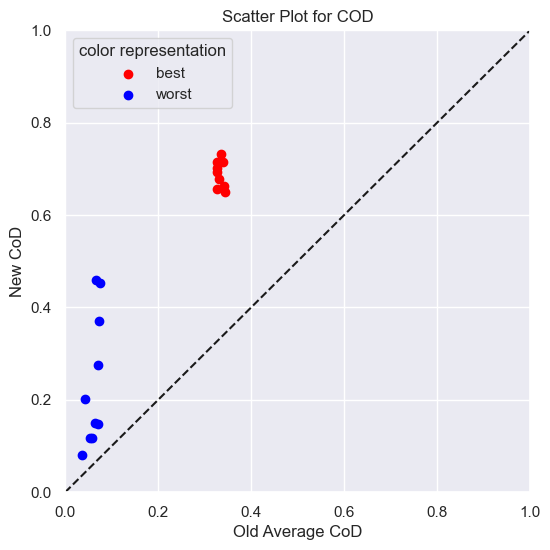

In [352]:
min_limit = 0
max_limit = 1

# Create a figure and axis
plt.figure(figsize=(6,6)) # Square figure to ensure the line is at a 45 degree angle
plt.axis([min_limit, max_limit, min_limit, max_limit])

# Plot a diagonal line
plt.plot([min_limit, max_limit], [min_limit, max_limit], 'k--')  # 'k--' is a black dashed line
categories = both['grade'].unique()
colors = {'best': 'red', 'worst': 'blue'}
# Plotting each category
for grade, color in colors.items():
    subset = both[both['grade'] == grade]
    plt.scatter(subset['average_cod'], subset['new_r2_from_MR'], color=color, label=grade)

plt.title('Scatter Plot for COD')
plt.xlabel('Old Average CoD')
plt.ylabel('New CoD')
plt.legend(title='color representation')
plt.show()

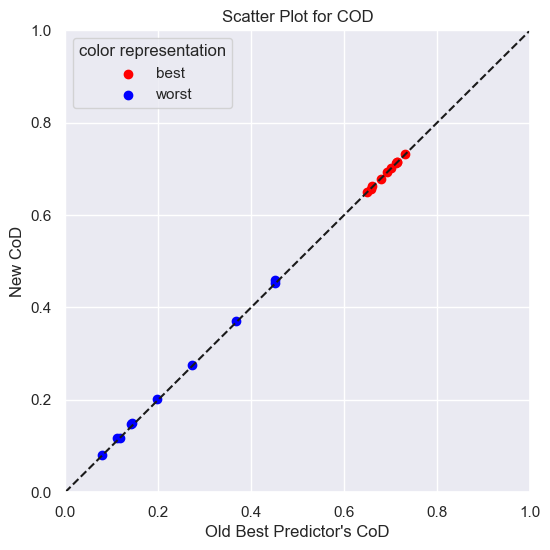

In [354]:
min_limit = 0
max_limit = 1

# Create a figure and axis
plt.figure(figsize=(6,6)) # Square figure to ensure the line is at a 45 degree angle
plt.axis([min_limit, max_limit, min_limit, max_limit])

# Plot a diagonal line
plt.plot([min_limit, max_limit], [min_limit, max_limit], 'k--')  # 'k--' is a black dashed line
categories = both['grade'].unique()
colors = {'best': 'red', 'worst': 'blue'}
# Plotting each category
for grade, color in colors.items():
    subset = both[both['grade'] == grade]
    plt.scatter(subset['max'], subset['new_r2_from_MR'], color=color, label=grade)

plt.title('Scatter Plot for COD')
plt.xlabel("Old Best Predictor's CoD")
plt.ylabel('New CoD')
plt.legend(title='color representation')
plt.show()

3. Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you
find by doing so.

In [355]:
ratings

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


In [380]:
selective = cod['average_cod'].sort_values()[185:215].index.to_list()
ten_other = cod.iloc[[40, 80, 120, 160, 290, 240, 280, 320, 360, 250], :].index.to_list()

In [386]:
x = ratings.loc[:, ten_other]
y = ratings[selective[0]]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

ridge_model = Ridge(alpha=1.0) # alpha is the regularization strength
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge Mean Squared Error: ", ridge_mse)

Ridge Mean Squared Error:  0.1747270612022866


In [397]:
# Assuming 'ratings', 'ten_other', and 'selective' are predefined
x = ratings.loc[:, ten_other]

alpha_values = np.logspace(-6, -1, num=6)
solver_options = ['auto', 'svd', 'cholesky', 'lsqr']

param_grid = {
    'alpha': alpha_values,
    'solver': solver_options
}

# Initialize a dictionary to store results
results_dict = {'Target_Variable': [], 'Best_Alpha': [], 'Best_Solver': [], 'RMSE': [], 'Coefficients': []}

for i in tqdm(range(30), desc="Processing"):  # Use tqdm for progress tracking
    y = ratings[selective[i]]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Best model, predictions, and RMSE
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results in the dictionary
    results_dict['Target_Variable'].append(selective[i])
    results_dict['Best_Alpha'].append(grid_search.best_params_['alpha'])
    results_dict['Best_Solver'].append(grid_search.best_params_['solver'])
    results_dict['RMSE'].append(rmse)
    results_dict['Coefficients'].append(best_model.coef_)

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)


Processing: 100%|███████████████████████████████| 30/30 [00:12<00:00,  2.32it/s]


In [400]:
results_df

,Target_Variable,Best_Alpha,Best_Solver,RMSE,Coefficients
0,The Thing (1982),0.100000,auto,4.180137e-01,"[0.06116309418177867, -0.03348486109790353, 0...."
1,12 Monkeys (1995),0.100000,auto,3.779504e-01,"[0.04679631566896907, -0.026294535603457396, 0..."
2,Bad Boys (1995),0.100000,svd,2.940820e-01,"[0.011091006632603139, 0.05739494271571169, -0..."
3,Armageddon (1998),0.100000,lsqr,4.064491e-01,"[-0.020736611961534857, 0.02608503614226006, 0..."
4,Bad Boys 2 (2003),0.100000,auto,2.901620e-01,"[0.025864099432912617, 0.014239917107697996, 0..."
5,The Mist (2007),0.100000,lsqr,3.800634e-01,"[0.0532564002419551, -0.004480567041728445, 0...."
6,The Others (2001),0.100000,svd,3.019151e-01,"[0.04962768147110816, -0.004976093212918849, 0..."
7,Braveheart (1995),0.100000,lsqr,2.902396e-01,"[-0.0008199425862479165, 0.00750295554857421, ..."
8,Baby Geniuses (1999),0.100000,lsqr,3.925816e-01,"[0.01759071100214228, 0.029316310438585645, 0...."
9,One Flew Over the Cuckoo's Nest (1975),0.000001,auto,2.906860e-09,"[5.65648393228864e-10, 4.3369103919460843e-11,..."
